In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('hahaha')

room_types = os.listdir('hahaha')
print (room_types) 

print("categories of disease: ", len(dataset_path))

['normal', 'osteopenia', 'osteoporosis']
categories of disease:  3


In [2]:
rooms = []
for item in room_types:
    all_rooms = os.listdir('hahaha' + '/' +item)

    for room in all_rooms:
        
        rooms.append((item, str('hahaha' + '/' +item) + '/' + room))
#         print(rooms)

In [3]:
osteo_df = pd.DataFrame(data=rooms, columns=['Y', 'images'])
print(osteo_df)
osteo_df.shape

                Y                                   images
0          normal                    hahaha/normal/N1.JPEG
1          normal                   hahaha/normal/N10.JPEG
2          normal                   hahaha/normal/N11.JPEG
3          normal                   hahaha/normal/N12.JPEG
4          normal                    hahaha/normal/N13.jpg
..            ...                                      ...
606  osteoporosis  hahaha/osteoporosis/Osteoporosis_95.jpg
607  osteoporosis  hahaha/osteoporosis/Osteoporosis_96.jpg
608  osteoporosis  hahaha/osteoporosis/Osteoporosis_97.jpg
609  osteoporosis  hahaha/osteoporosis/Osteoporosis_98.jpg
610  osteoporosis  hahaha/osteoporosis/Osteoporosis_99.jpg

[611 rows x 2 columns]


(611, 2)

In [4]:
images, Y = osteo_df['images'] , osteo_df['Y']

In [5]:
from sklearn.model_selection import train_test_split

# Assuming you have loaded your dataset into 'images' and 'Y' arrays

# Shuffle the data
# images, Y = shuffle(images, Y, random_state=42)

# Split into train and test sets
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=27)


In [6]:
train_x.shape

(580,)

In [7]:
a = np.array(test_y)
test_y.describe()

count               31
unique               3
top       osteoporosis
freq                12
Name: Y, dtype: object

In [8]:
categories, counts = np.unique(a, return_counts=True)
for category, count in zip(categories, counts):
    print(f'{category}: {count}')

normal: 11
osteopenia: 8
osteoporosis: 12


In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import GlorotNormal

In [10]:
import cv2
import numpy as np

def preprocess_images(images):
    processed_images = []
    for img in images:
        img = cv2.imread(img)
        # Resize image to (227, 227)
        resized_img = cv2.resize(img, (227, 227))
        # Preprocess the image (normalize pixel values to range [0, 1])
        resized_img = resized_img / 255.0  
        processed_images.append(resized_img)
    return np.array(processed_images)

# Preprocess train and test images
train_x_processed = preprocess_images(train_x)
test_x_processed = preprocess_images(test_x)


In [11]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform target labels
train_y_encoded = label_encoder.fit_transform(train_y)
test_y_encoded = label_encoder.transform(test_y)

# Convert the encoded labels to one-hot encoded format
train_y_onehot = to_categorical(train_y_encoded)
test_y_onehot = to_categorical(test_y_encoded)


In [12]:
def AlexNet(input_shape=(227, 227, 3), num_classes=3):
    # Input layer
    inputs = Input(shape=input_shape)

    # Layer 1
    x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu', padding='valid', kernel_initializer = GlorotNormal())(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Layer 2
    x = Conv2D(256, (5, 5), activation='relu', padding='same',kernel_initializer = GlorotNormal())(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Layer 3
    x = Conv2D(384, (3, 3), activation='relu', padding='same',kernel_initializer = GlorotNormal())(x)

    # Layer 4
    x = Conv2D(384, (3, 3), activation='relu', padding='same',kernel_initializer = GlorotNormal())(x)

    # Layer 5
    x = Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer = GlorotNormal())(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Flatten
    x = Flatten()(x)

    # Layer 6
    x = Dense(4096, activation='relu',kernel_initializer = GlorotNormal())(x)
    x = Dropout(0.5)(x)

    # Layer 7
    x = Dense(4096, activation='relu',kernel_initializer = GlorotNormal())(x)
    x = Dropout(0.5)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs, name='alexnet')

    return model

In [15]:
# Create AlexNet model
alexnet_model = AlexNet(input_shape=(227, 227, 3), num_classes=3)
optimizer = Adam(learning_rate = 0.0001)
    
alexnet_model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics = ['accuracy'])

In [31]:
history = alexnet_model.fit(train_x_processed, train_y_onehot, batch_size=20, epochs=50, validation_data=(test_x_processed, test_y_onehot))

Epoch 1/50


29/29 [==============================] - 29s 878ms/step - loss: 1.0719 - accuracy: 0.3983 - val_loss: 1.0394 - val_accuracy: 0.3871
Epoch 2/50
29/29 [==============================] - 23s 778ms/step - loss: 0.9626 - accuracy: 0.5086 - val_loss: 0.8859 - val_accuracy: 0.6129
Epoch 3/50
29/29 [==============================] - 23s 790ms/step - loss: 0.8804 - accuracy: 0.5638 - val_loss: 0.8862 - val_accuracy: 0.6452
Epoch 4/50
29/29 [==============================] - 23s 802ms/step - loss: 0.8905 - accuracy: 0.5914 - val_loss: 0.8247 - val_accuracy: 0.6452
Epoch 5/50
29/29 [==============================] - 23s 781ms/step - loss: 0.8358 - accuracy: 0.5793 - val_loss: 0.7929 - val_accuracy: 0.6452
Epoch 6/50
29/29 [==============================] - 23s 790ms/step - loss: 0.8235 - accuracy: 0.6207 - val_loss: 0.7637 - val_accuracy: 0.6452
Epoch 7/50
29/29 [==============================] - 23s 789ms/step - loss: 0.7954 - accuracy: 0.6259 - val_loss: 0.8542 - val_accuracy: 0.64

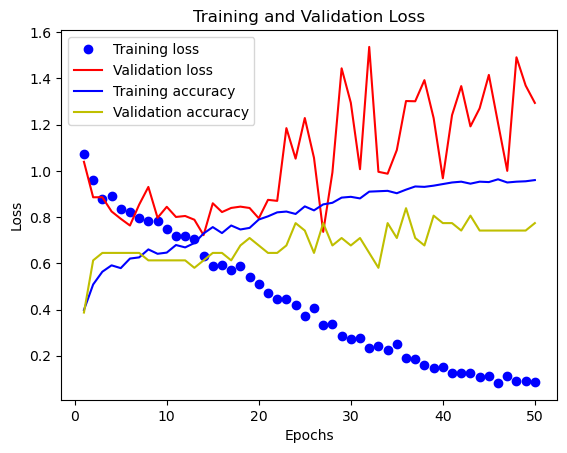

In [32]:
import matplotlib.pyplot as plt

def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'bo', label='Training loss')  # 'bo' for blue dots
    plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 'r' for solid red line
    plt.plot(epochs, acc,'b', label='Training accuracy')
    plt.plot(epochs, val_acc ,'y', label = 'Validation accuracy')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Assuming you have a 'history' object from your model's training process
plot_loss(history)


In [33]:
alexnet_model.save("Alex - Net.h5")

C:\Users\piriy\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
alexnet_model.save("Alex - Net.keras")

In [35]:
from keras.models import load_model

# Load the model
loaded_model = load_model("Alex - Net.keras")


In [36]:
# Evaluate the model on the test set
loss, accuracy = loaded_model.evaluate(test_x_processed, test_y_onehot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


1/1 [==============================] - 1s 709ms/step - loss: 1.2944 - accuracy: 0.7742
Test Loss: 1.294367790222168
Test Accuracy: 0.774193525314331


In [37]:
# Evaluate the model on the train set
loss, accuracy = loaded_model.evaluate(train_x_processed, train_y_onehot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


19/19 [==============================] - 4s 221ms/step - loss: 0.0579 - accuracy: 0.9690
Test Loss: 0.05785081908106804
Test Accuracy: 0.9689655303955078
